In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
city_day = pd.read_csv('city_day.csv')
city_day['Date'] = pd.to_datetime(city_day['Date'])

In [3]:
city_day.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [4]:
city_day['PM'] = city_day['PM2.5']+city_day['PM10']
city_day['N'] = city_day['NO']+city_day['NO2']+city_day['NOx']
city_day['misc'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']

In [5]:
cities_AQI = city_day.pivot_table(values = 'AQI', index =['Date'], columns = 'City')
cities_PM = city_day.pivot_table(values = 'PM', index =['Date'], columns = 'City')
cities_N = city_day.pivot_table(values = 'N', index =['Date'], columns = 'City')
cities_misc = city_day.pivot_table(values = 'misc', index =['Date'], columns = 'City')
cities_NH3 = city_day.pivot_table(values = 'NH3', index =['Date'], columns = 'City')
cities_CO = city_day.pivot_table(values = 'CO', index =['Date'], columns = 'City')
cities_SO2 = city_day.pivot_table(values = 'SO2', index =['Date'], columns = 'City')
cities_O3 = city_day.pivot_table(values = 'O3', index =['Date'], columns = 'City')

In [6]:
cities_AQI = cities_AQI.resample(rule='MS').mean()
cities_PM = cities_PM.resample(rule='MS').mean()
cities_N = cities_N.resample(rule='MS').mean()
cities_misc = cities_misc.resample(rule='MS').mean()
cities_NH3 = cities_NH3.resample(rule='MS').mean()
cities_CO = cities_CO.resample(rule='MS').mean()
cities_SO2 = cities_SO2.resample(rule='MS').mean()
cities_O3 = cities_O3.resample(rule='MS').mean()

In [7]:
cities_AQI['India_AQI'] = cities_AQI.mean(axis=1)
cities_AQI['India_PM'] = cities_PM.mean(axis=1)
cities_AQI['India_N'] = cities_N.mean(axis=1)
cities_AQI['India_misc'] = cities_misc.mean(axis=1)
cities_AQI['India_NH3'] = cities_NH3.mean(axis=1)
cities_AQI['India_CO'] = cities_CO.mean(axis=1)
cities_AQI['India_SO2'] = cities_SO2.mean(axis=1)
cities_AQI['India_O3'] = cities_O3.mean(axis=1)

In [8]:
cities_AQI.reset_index()
cities = cities_AQI[['India_AQI','India_PM', 'India_N', 'India_misc','India_NH3', 'India_CO', 'India_SO2', 'India_O3']]

In [9]:
cities

City,India_AQI,India_PM,India_N,India_misc,India_NH3,India_CO,India_SO2,India_O3
Date,,,,,,,,
2015-01-01,346.311828,452.661935,70.367402,9.542840,40.768495,7.405867,40.815474,29.115438
2015-02-01,424.284286,388.860000,72.756523,17.462624,48.108770,7.313960,35.628993,35.389943
2015-03-01,258.875688,215.382581,61.607278,17.448758,22.132796,6.328932,18.838885,39.369746
2015-04-01,193.815995,279.553667,60.217023,8.502438,22.508889,3.665795,17.972341,39.722248
2015-05-01,193.556272,368.160000,66.988011,11.135806,29.854409,4.225728,15.328441,39.067529
...,...,...,...,...,...,...,...,...
2020-03-01,110.777963,128.778937,64.705351,15.550564,20.828581,1.138563,13.341088,35.044914
2020-04-01,86.532043,101.233390,44.932826,9.141337,18.045861,0.727618,11.795134,36.200730
2020-05-01,88.262751,101.386523,62.555038,12.243672,15.954203,0.701900,10.561917,37.493234


In [10]:
res_AQI = sm.tsa.seasonal_decompose(cities['India_AQI'], model = 'additive')
res_PM = sm.tsa.seasonal_decompose(cities['India_PM'], model = 'additive')
res_N = sm.tsa.seasonal_decompose(cities['India_N'], model = 'additive')
res_misc = sm.tsa.seasonal_decompose(cities['India_misc'], model = 'additive')
res_NH3 = sm.tsa.seasonal_decompose(cities['India_NH3'], model = 'additive')
res_CO = sm.tsa.seasonal_decompose(cities['India_CO'], model = 'additive')
res_SO2 = sm.tsa.seasonal_decompose(cities['India_SO2'], model = 'additive')
res_O3 = sm.tsa.seasonal_decompose(cities['India_O3'], model = 'additive')

In [11]:
print("AQI = ", sm.tsa.adfuller(cities['India_AQI'], autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(cities['India_PM'], autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(cities['India_N'], autolag = 'AIC')[1],
      "misc = ", sm.tsa.adfuller(cities['India_misc'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(cities['India_NH3'], autolag = 'AIC')[1],
      "CO = ", sm.tsa.adfuller(cities['India_CO'], autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(cities['India_SO2'], autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(cities['India_O3'], autolag = 'AIC')[1])
#adf, pval, usedlag, nobs, critical values, icbest, resstore

AQI =  0.9480031853242684 PM =  0.5253844586072645 N =  8.193038428894208e-07 misc =  0.13268436274674816 NH3 =  0.5329816251905 CO =  0.0009896915101338486 SO2 =  0.00030243578054873837 O3 =  0.6987197800366467


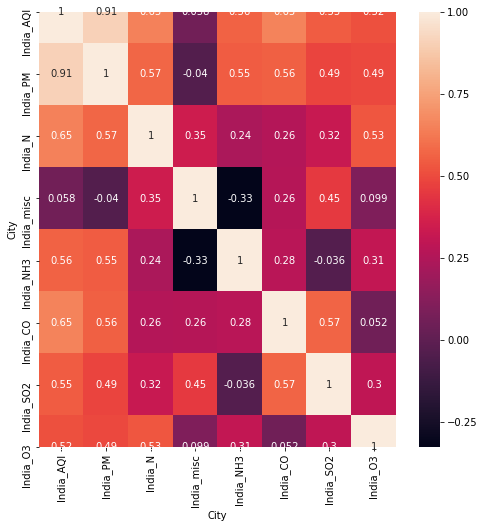

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(cities.corr(), annot = True)

Only N, CO and SO2 have a p value < 0.05, misc can be dropped
This implies that the rest of the variables are non-stationary
Let's visualize the variables

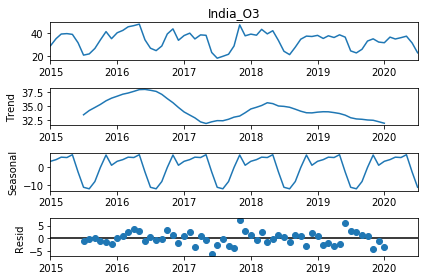

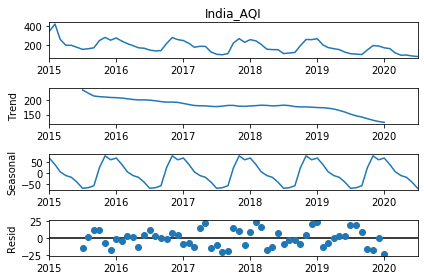

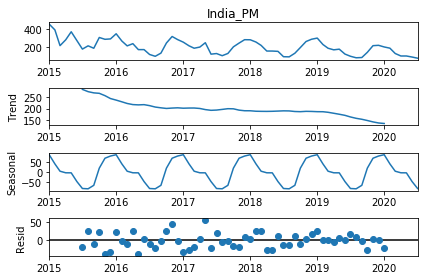

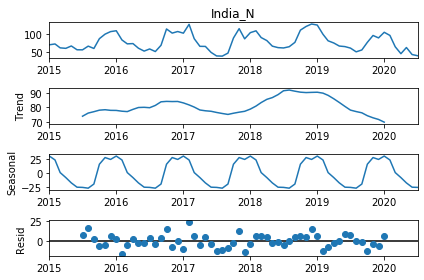

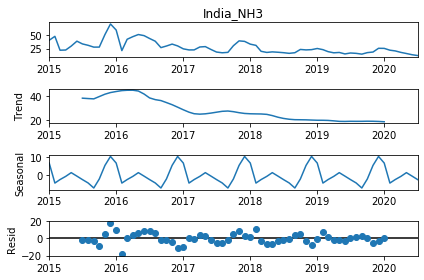

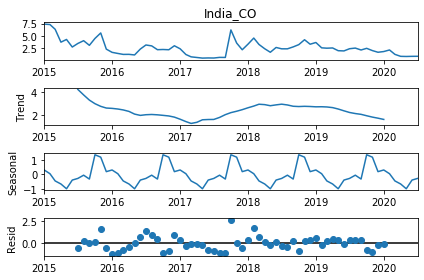

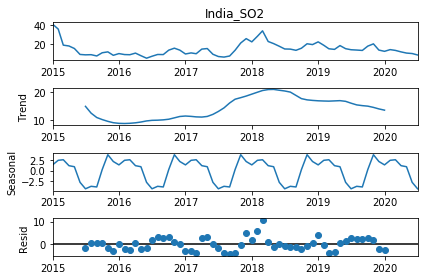

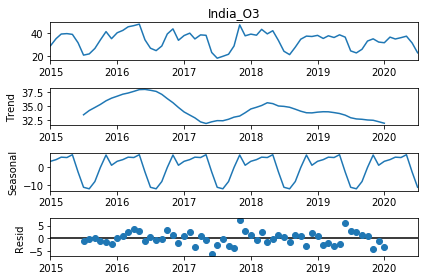

In [20]:
res_AQI.plot()
res_PM.plot()
res_N.plot()
res_NH3.plot()
res_CO.plot()
res_SO2.plot()
res_O3.plot()

Clear trend and seasonality in a lot of varaibles, let's perform differencing on non stationary variables

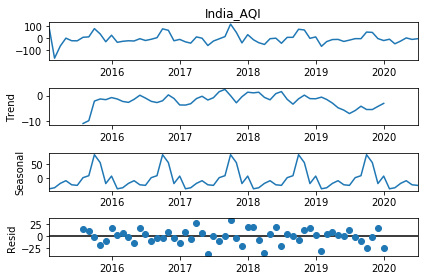

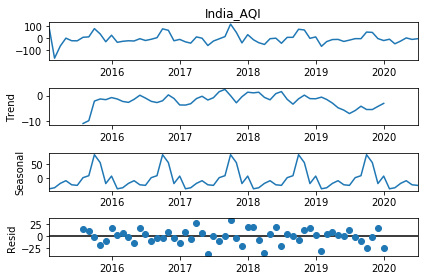

In [21]:
diff_city_AQI = cities['India_AQI'].diff(periods = 1)
diff_city_AQI.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_AQI, model = 'additive').plot()

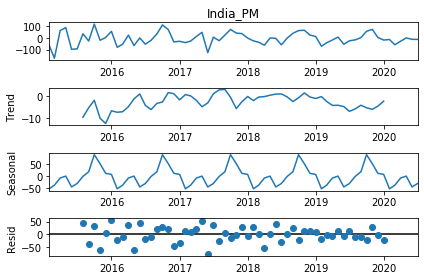

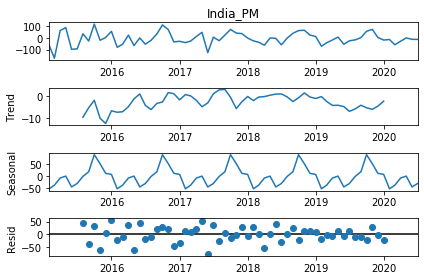

In [22]:
diff_city_PM = cities['India_PM'].diff(periods = 1)
diff_city_PM.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_PM, model = 'additive').plot()

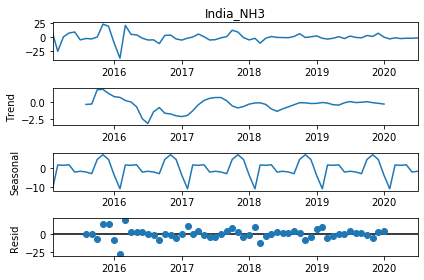

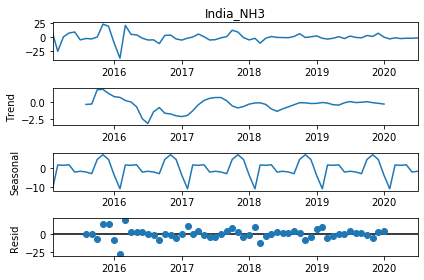

In [23]:
diff_city_NH3 = cities['India_NH3'].diff(periods = 1)
diff_city_NH3.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_NH3, model = 'additive').plot()

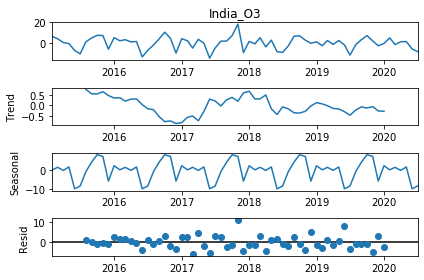

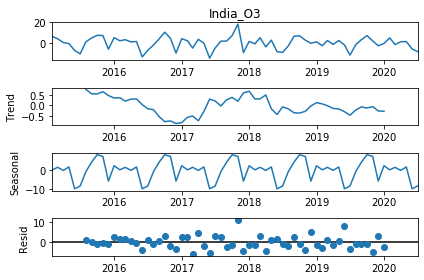

In [24]:
diff_city_O3 = cities['India_O3'].diff(periods = 1)
diff_city_O3.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_O3, model = 'additive').plot()

In [25]:
print("AQI = ", sm.tsa.adfuller(diff_city_AQI, autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(diff_city_PM, autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(cities['India_N'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(diff_city_NH3, autolag = 'AIC')[1],
      "CO = ", sm.tsa.adfuller(cities['India_CO'], autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(cities['India_SO2'], autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(diff_city_O3, autolag = 'AIC')[1])

AQI =  2.4485991962022827e-13 PM =  5.3299227861846e-09 N =  8.193038428894208e-07 NH3 =  4.613141405579754e-11 CO =  0.0009896915101338486 SO2 =  0.00030243578054873837 O3 =  0.018435717835630125


Now all the variables are stationary

C:\Users\Naveeta\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


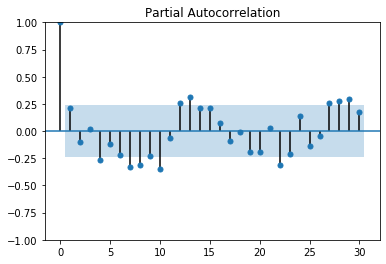

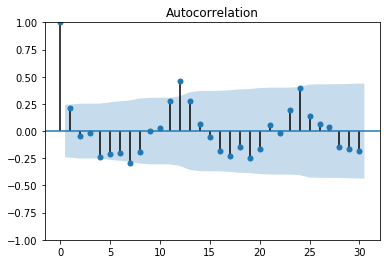

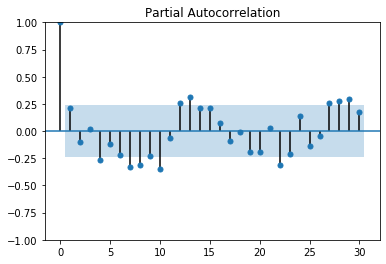

In [26]:
sm.graphics.tsa.plot_acf(diff_city_AQI, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_AQI,lags=30)

P Q value for AQI = 1,1

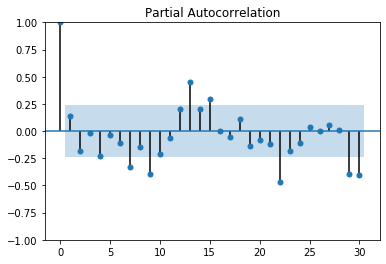

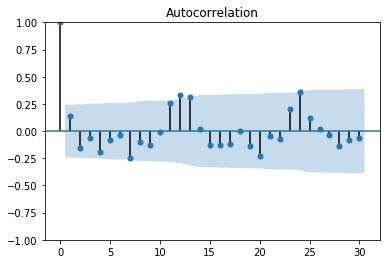

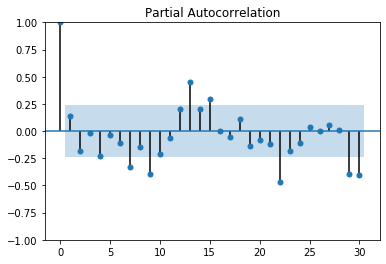

In [27]:
sm.graphics.tsa.plot_acf(diff_city_PM, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_PM,lags=30)

P Q value for PM = 1,1

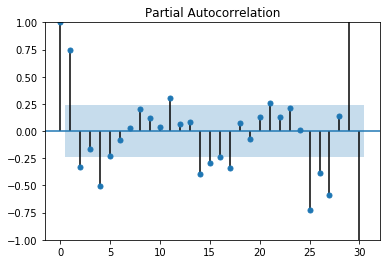

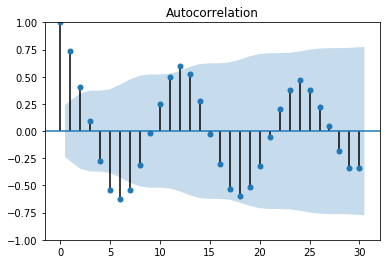

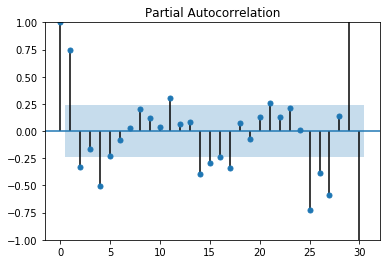

In [28]:
sm.graphics.tsa.plot_acf(cities['India_N'], lags=30)
sm.graphics.tsa.plot_pacf(cities['India_N'],lags=30)

P Q value for N = 1,1

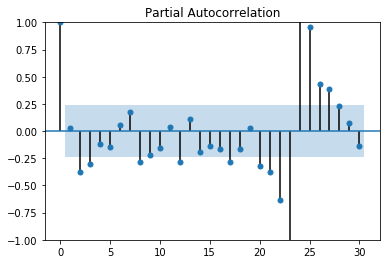

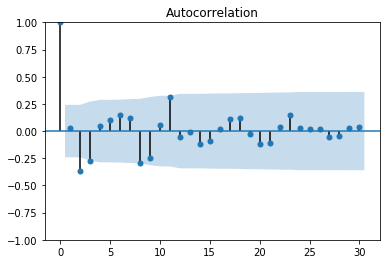

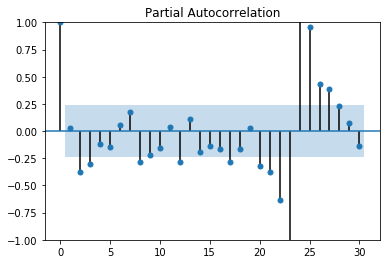

In [29]:
sm.graphics.tsa.plot_acf(diff_city_NH3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_NH3,lags=30)

P Q value for NH3 = 1,1

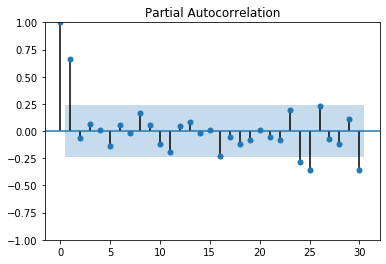

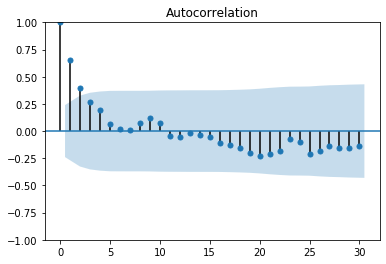

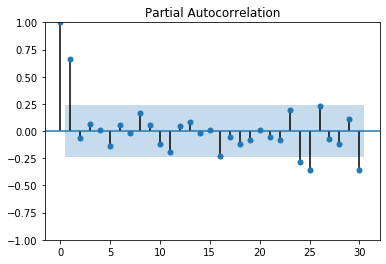

In [30]:
sm.graphics.tsa.plot_acf(cities['India_CO'], lags=30)
sm.graphics.tsa.plot_pacf(cities['India_CO'],lags=30)

P Q value for CO = 1,1

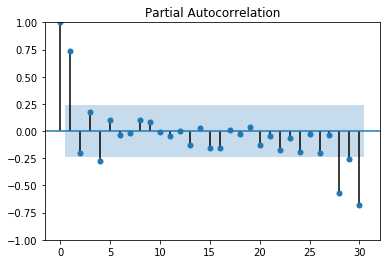

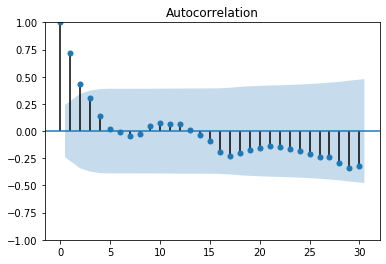

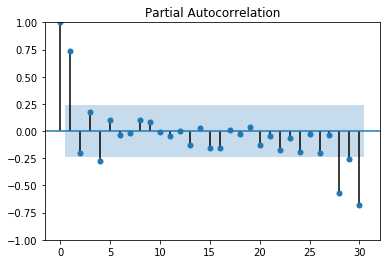

In [31]:
sm.graphics.tsa.plot_acf(cities['India_SO2'], lags=30)
sm.graphics.tsa.plot_pacf(cities['India_SO2'],lags=30)

P Q value for SO2 = 1,1

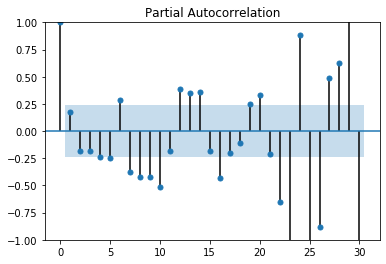

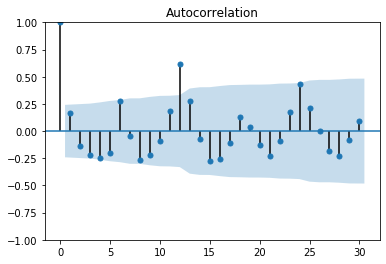

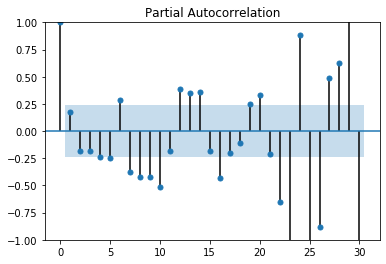

In [32]:
sm.graphics.tsa.plot_acf(diff_city_O3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_O3,lags=30)

P Q value for O3= 1,1

model = sm.tsa.ARIMA(cities['India_AQI'], order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())

y = model_fit.predict()

train = cities['India_AQI'][:'2016-12-01']
test = cities['India_AQI']['2017-01-01':]